In [2]:
import pandas as pd

In [3]:
nobel = pd.read_json('data/prize.json')
nobel

,prizes
0,"{'year': '2022', 'category': 'chemistry', 'lau..."
1,"{'year': '2022', 'category': 'economics', 'lau..."
2,"{'year': '2022', 'category': 'literature', 'la..."
3,"{'year': '2022', 'category': 'peace', 'laureat..."
4,"{'year': '2022', 'category': 'physics', 'laure..."
...,...
659,"{'year': '1901', 'category': 'chemistry', 'lau..."
660,"{'year': '1901', 'category': 'literature', 'la..."
661,"{'year': '1901', 'category': 'peace', 'laureat..."
662,"{'year': '1901', 'category': 'physics', 'laure..."


In [4]:
nobel.loc[2, 'prizes']

{'year': '2022',
 'category': 'literature',
 'laureates': [{'id': '1017',
   'firstname': 'Annie',
   'surname': 'Ernaux',
   'motivation': '"for the courage and clinical acuity with which she uncovers the roots, estrangements and  collective restraints of personal memory"',
   'share': '1'}]}

In [5]:
second = nobel.loc[2, 'prizes']
pd.json_normalize(second)

,year,category,laureates
0,2022,literature,"[{'id': '1017', 'firstname': 'Annie', 'surname..."


In [6]:
pd.json_normalize(second, record_path='laureates')

,id,firstname,surname,motivation,share
0,1017,Annie,Ernaux,"""for the courage and clinical acuity with whic...",1


In [7]:
pd.json_normalize(second, record_path='laureates', meta=['year', 'category'])

,id,firstname,surname,motivation,share,year,category
0,1017,Annie,Ernaux,"""for the courage and clinical acuity with whic...",1,2022,literature


In [ ]:
winners = pd.json_normalize(nobel['prizes'], record_path='laureates', meta=['year', 'category']) # will gives error because all of record haven't laureates columns
winners

In [9]:
def add_laureates_key(entry):
    entry.setdefault('laureates', [])

nobel['prizes'].apply(add_laureates_key)

winners = pd.json_normalize(nobel['prizes'], record_path='laureates', meta=['year', 'category']) # will gives error because all of record haven't laureates columns
winners


,id,firstname,surname,motivation,share,year,category
0,1015,Carolyn,Bertozzi,"""for the development of click chemistry and bi...",3,2022,chemistry
1,1016,Morten,Meldal,"""for the development of click chemistry and bi...",3,2022,chemistry
2,743,Barry,Sharpless,"""for the development of click chemistry and bi...",3,2022,chemistry
3,1021,Ben,Bernanke,"""for research on banks and financial crises""",3,2022,economics
4,1022,Douglas,Diamond,"""for research on banks and financial crises""",3,2022,economics
...,...,...,...,...,...,...,...
984,569,Sully,Prudhomme,"""in special recognition of his poetic composit...",1,1901,literature
985,462,Henry,Dunant,"""for his humanitarian efforts to help wounded ...",2,1901,peace
986,463,Frédéric,Passy,"""for his lifelong work for international peace...",2,1901,peace
987,1,Wilhelm Conrad,Röntgen,"""in recognition of the extraordinary services ...",1,1901,physics


In [10]:
winners = winners.head()
winners

,id,firstname,surname,motivation,share,year,category
0,1015,Carolyn,Bertozzi,"""for the development of click chemistry and bi...",3,2022,chemistry
1,1016,Morten,Meldal,"""for the development of click chemistry and bi...",3,2022,chemistry
2,743,Barry,Sharpless,"""for the development of click chemistry and bi...",3,2022,chemistry
3,1021,Ben,Bernanke,"""for research on banks and financial crises""",3,2022,economics
4,1022,Douglas,Diamond,"""for research on banks and financial crises""",3,2022,economics


In [11]:
winners.to_json() # saves columns and their values but we want save rows way

'{"id":{"0":"1015","1":"1016","2":"743","3":"1021","4":"1022"},"firstname":{"0":"Carolyn","1":"Morten","2":"Barry","3":"Ben","4":"Douglas"},"surname":{"0":"Bertozzi","1":"Meldal","2":"Sharpless","3":"Bernanke","4":"Diamond"},"motivation":{"0":"\\"for the development of click chemistry and bioorthogonal chemistry\\"","1":"\\"for the development of click chemistry and bioorthogonal chemistry\\"","2":"\\"for the development of click chemistry and bioorthogonal chemistry\\"","3":"\\"for research on banks and financial crises\\"","4":"\\"for research on banks and financial crises\\""},"share":{"0":"3","1":"3","2":"3","3":"3","4":"3"},"year":{"0":"2022","1":"2022","2":"2022","3":"2022","4":"2022"},"category":{"0":"chemistry","1":"chemistry","2":"chemistry","3":"economics","4":"economics"}}'

In [12]:
winners.to_json(orient='records')

'[{"id":"1015","firstname":"Carolyn","surname":"Bertozzi","motivation":"\\"for the development of click chemistry and bioorthogonal chemistry\\"","share":"3","year":"2022","category":"chemistry"},{"id":"1016","firstname":"Morten","surname":"Meldal","motivation":"\\"for the development of click chemistry and bioorthogonal chemistry\\"","share":"3","year":"2022","category":"chemistry"},{"id":"743","firstname":"Barry","surname":"Sharpless","motivation":"\\"for the development of click chemistry and bioorthogonal chemistry\\"","share":"3","year":"2022","category":"chemistry"},{"id":"1021","firstname":"Ben","surname":"Bernanke","motivation":"\\"for research on banks and financial crises\\"","share":"3","year":"2022","category":"economics"},{"id":"1022","firstname":"Douglas","surname":"Diamond","motivation":"\\"for research on banks and financial crises\\"","share":"3","year":"2022","category":"economics"}]'

In [13]:
winners.to_json('new_nobel.json', orient='records') # save rows to the new.json files

In [14]:
baby = pd.read_csv('data/Popular_Baby_Names.csv')
baby.head()

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2011,FEMALE,HISPANIC,GERALDINE,13,75
1,2011,FEMALE,HISPANIC,GIA,21,67
2,2011,FEMALE,HISPANIC,GIANNA,49,42
3,2011,FEMALE,HISPANIC,GISELLE,38,51
4,2011,FEMALE,HISPANIC,GRACE,36,53


In [15]:
baby.head().to_csv('new_baby.csv', index=False, columns=['Gender', "Child's First Name"])

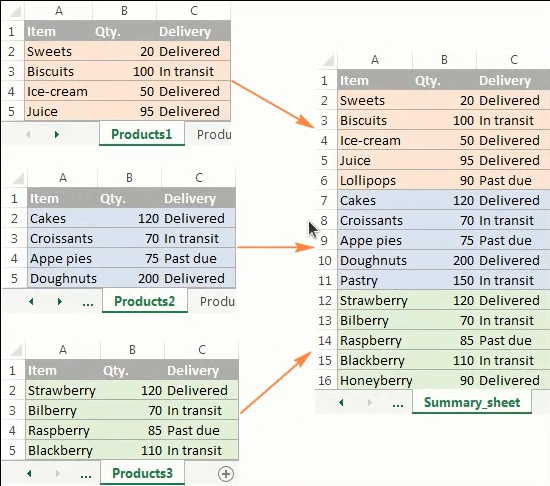

In [16]:
pd.read_excel('data/Single Worksheet.xlsx')

,First Name,Last Name,City,Gender
0,Brandon,James,Miami,M
1,Sean,Hawkins,Denver,M
2,Judy,Day,Los Angeles,F
3,Ashley,Ruiz,San Francisco,F
4,Stephanie,Gomez,Portland,F


In [17]:
pd.read_excel('data/Multiple Worksheets.xlsx') # first sheet

,First Name,Last Name,City,Gender
0,Brandon,James,Miami,M
1,Sean,Hawkins,Denver,M
2,Judy,Day,Los Angeles,F
3,Ashley,Ruiz,San Francisco,F
4,Stephanie,Gomez,Portland,F


In [18]:
pd.read_excel('data/Multiple Worksheets.xlsx', sheet_name=1) # sheet_name = 0,1,2,...

,First Name,Last Name,City,Gender
0,Parker,Power,Raleigh,F
1,Preston,Prescott,Philadelphia,F
2,Ronaldo,Donaldo,Bangor,M
3,Megan,Stiller,San Francisco,M
4,Bustin,Jieber,Austin,F


In [21]:
pd.read_excel('data/Multiple Worksheets.xlsx', sheet_name=[1, 2])

{1:   First Name Last Name           City Gender
 0     Parker     Power        Raleigh      F
 1    Preston  Prescott   Philadelphia      F
 2    Ronaldo   Donaldo         Bangor      M
 3      Megan   Stiller  San Francisco      M
 4     Bustin    Jieber         Austin      F,
 2:   First Name  Last Name     City Gender
 0     Robert     Miller  Seattle      M
 1       Tara     Garcia  Phoenix      F
 2    Raphael  Rodriguez  Orlando      M}

In [19]:
pd.read_excel('data/Multiple Worksheets.xlsx', sheet_name=None) # gives all sheets as dictunary

{'Data 1':   First Name Last Name           City Gender
 0    Brandon     James          Miami      M
 1       Sean   Hawkins         Denver      M
 2       Judy       Day    Los Angeles      F
 3     Ashley      Ruiz  San Francisco      F
 4  Stephanie     Gomez       Portland      F,
 'Data 2':   First Name Last Name           City Gender
 0     Parker     Power        Raleigh      F
 1    Preston  Prescott   Philadelphia      F
 2    Ronaldo   Donaldo         Bangor      M
 3      Megan   Stiller  San Francisco      M
 4     Bustin    Jieber         Austin      F,
 'Data 3':   First Name  Last Name     City Gender
 0     Robert     Miller  Seattle      M
 1       Tara     Garcia  Phoenix      F
 2    Raphael  Rodriguez  Orlando      M}

In [20]:
workbook = pd.read_excel('data/Multiple Worksheets.xlsx', sheet_name=None)
workbook['Data 1']

,First Name,Last Name,City,Gender
0,Brandon,James,Miami,M
1,Sean,Hawkins,Denver,M
2,Judy,Day,Los Angeles,F
3,Ashley,Ruiz,San Francisco,F
4,Stephanie,Gomez,Portland,F
